# Assignment 1
$$ \dotsc $$<br>
**Harsh Chaturvedi<br>
Section:** C<br>
**Roll No:** 29<br>
**University Roll No:** 2014669<br>
$$ \dotsc $$<br>

**Ques 1: Download the data set and implement Hierarchical Agglomerative algorithm to achieve clustering.**<br>
Ans 1:<br>
The solution is divided into two parts. Part 1 contains implementing using `sklearn` and `scipy`. Part 2 contains implementing from scratch. <br>

**Part 1: Using `sklearn` and `scipy`**

Module Imports:

In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import dendrogram, ward

Reading the customers.csv file and storing it in a pandas' `DataFrame`:

In [2]:
cust_data = pd.read_csv('customers.csv')
print(cust_data.head(12))

    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   19                  15                      39
1            2    Male   21                  15                      81
2            3  Female   20                  16                       6
3            4  Female   23                  16                      77
4            5  Female   31                  17                      40
5            6  Female   22                  17                      76
6            7  Female   35                  18                       6
7            8  Female   23                  18                      94
8            9    Male   64                  19                       3
9           10  Female   30                  19                      72
10          11    Male   67                  19                      14
11          12  Female   35                  19                      99


We can ignore the columns: CustomerID, Genre and Age as they are irrelevent to the task.<br>
Extracting the 'Annual Income (k\$)' and 'Spending Score (1-100)' columns:

In [3]:
data = cust_data.iloc[:, 3:5].values

Creating Dendrograms using `scipy` to know the clusters to split our data into, using ward linkage:

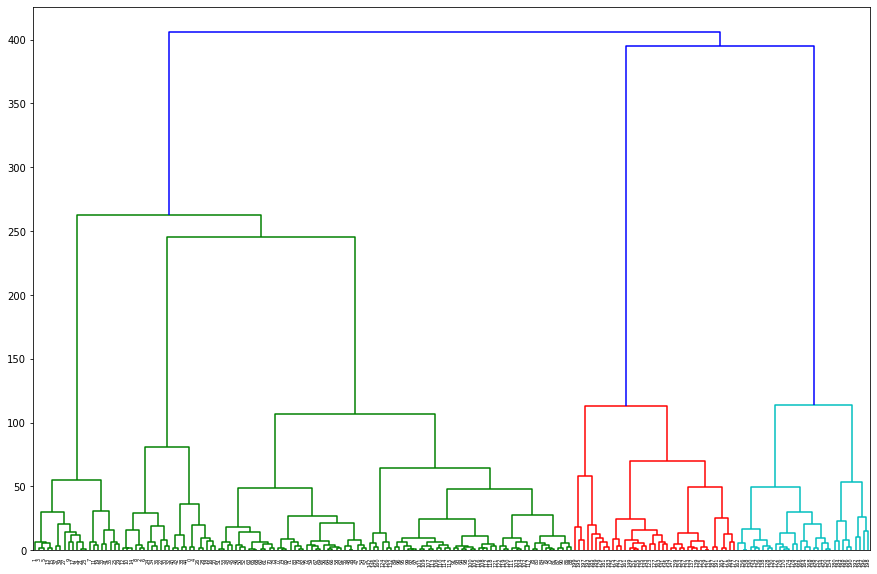

In [4]:
plt.figure(figsize=(15,10))

dg = dendrogram(ward(data))

Since there are 5 clusters in the largest area without a horizontal line, therefore 5 clusters will be used for the dataset. 

Now, grouping the datapoints into 5 clusters:

In [5]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clstr = ac.fit_predict(data)
print(clstr)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Finally, plotting the clusters, we get:

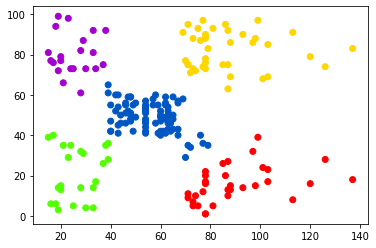

In [6]:
plt.scatter(data[:,0], data[:,1], cmap='prism', c=ac.labels_)

**Part 2: Implementing from scratch:**

Function to get distance using Euclidean Theorem:

In [9]:
def getDistance(o1, o2):
#     print(f'Getting distance between {a},{b}')
    x2mx1sq = (o2[0]-o1[0])**2
    y2my1sq = (o2[1]-o1[1])**2
    return round(math.sqrt(x2mx1sq+y2my1sq), 2)

Function to get minimum in a matrix:

In [12]:
def getMinimium(distance_matrix):
    p = [0,0]
    mn = distance_matrix[0][0]
    for i in range(0, len(distance_matrix)):
        for j in range(0, len(distance_matrix[i])):
            if (distance_matrix[i][j]>0 and distance_matrix[i][j]<mn):
                mn = distance_matrix[i][j]
                p=[i,j]     
    return p

Function to create a Distance Matrix:

In [8]:
def createDistanceMatrix(array):
    distance_matrix = [[None for _ in range(array.shape[0])] for _ in range(array.shape[0])]
    for i in range(array.shape[0]):
            for j in range(0,i+1):
                distance_matrix[i][j] = getDistance(array[i,:], array[j,:])
    return np.array(distance_matrix)

Function to create clusters using Agglomerative Clustering using Simple Linkage:

In [15]:
def AgglomerativeClusteringScratch(array):
    
    distance_matrix = [[None for _ in range(array.shape[1])] for _ in range(array.shape[1])]
    clusters = list()
    distance_matrix = createDistanceMatrix(array)

    
    while(len(distance_matrix) > 2):
        new_distance_matrix = distance_matrix.copy()
        
        ## STEP 1: Find Mimimun:
        ##print(distance_matrix)
        minIndex = [1,0]
        minValue = distance_matrix[minIndex[0]][minIndex[1]]

        for i in range(len(distance_matrix)):
            for j in range(len(distance_matrix)):
                if(distance_matrix[i][j]):
                    if minValue > distance_matrix[i][j]:
                        minValue = distance_matrix[i][j]
                        minIndex = [i,j]

        #print(f'\nMinimum: {minValue} at Index {minIndex}')
        newCluster = minIndex.copy()
        #print(f'New Cluster: {newCluster}')
        
        clusters.append(newCluster)
        
        new_distance_matrix = np.delete(new_distance_matrix,minIndex[0],0)
        new_distance_matrix = np.delete(new_distance_matrix,minIndex[1],0)
        
        new_distance_matrix = np.delete(new_distance_matrix,minIndex[0],1)
        new_distance_matrix = np.delete(new_distance_matrix,minIndex[1],1)
        
        x= list()
        for n in range(len(new_distance_matrix)):
            if ~(n in minIndex):
                if (distance_matrix[minIndex[0]][n]):
                    a = distance_matrix[minIndex[0]][n]
                if (distance_matrix[minIndex[1]][n]):
                    b = distance_matrix[minIndex[1]][n]
                x.append(min(a,b))
        x.append(0.0)

        y = np.array(list([None] for _ in range(len(new_distance_matrix))))

        x = np.array([x])
        
        #print('y:', y)
        #print('x:', x)
        
        new_distance_matrix = np.hstack((new_distance_matrix, y))
        new_distance_matrix = np.vstack((new_distance_matrix, x))
        
        
        distance_matrix = new_distance_matrix.copy()
#         distance_matrix = np.delete(distance_matrix,minIndex[0],0)
#         distance_matrix = np.delete(distance_matrix,minIndex[1],0)
    return clusters
        
        
    
clusters_scratch = AgglomerativeClusteringScratch(data)
print('Clusters formed (in order): ', clusters_scratch)

Clusters formed (in order):  [[23, 21], [51, 49], [57, 56], [59, 57], [58, 57], [59, 57], [64, 63], [63, 62], [64, 62], [64, 62], [77, 72], [76, 73], [80, 79], [79, 76], [81, 76], [83, 78], [88, 87], [120, 116], [119, 115], [136, 132], [160, 21], [159, 48], [158, 54], [158, 54], [158, 58], [157, 58], [158, 66], [157, 66], [156, 69], [156, 68], [155, 68], [154, 76], [153, 103], [152, 103], [151, 118], [150, 21], [149, 47], [148, 52], [147, 52], [146, 54], [145, 54], [145, 60], [144, 61], [145, 68], [145, 94], [144, 108], [143, 21], [142, 46], [141, 50], [140, 50], [139, 50], [138, 50], [137, 54], [136, 54], [135, 60], [134, 85], [133, 98], [132, 21], [131, 45], [130, 48], [129, 48], [128, 48], [127, 48], [127, 48], [126, 53], [125, 77], [124, 89], [123, 21], [122, 44], [121, 46], [120, 46], [119, 46], [118, 46], [117, 46], [116, 46], [115, 69], [114, 80], [113, 21], [112, 43], [111, 44], [110, 44], [109, 44], [108, 44], [107, 44], [106, 44], [105, 61], [104, 71], [103, 21], [102, 42], [

$$ \dotsc $$<br>